Tables and graphs from reference to paper 

1. A systematic review through graphical visualization and analysis of teaching pillar of top five Times Higher Education (THE) ranked universities for the period 2020-2023.

Read CSV

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from io import StringIO

data = pd.read_csv(r"combined (2020-24 v3).csv")
df = pd.DataFrame(data)

# Teaching scores

Top 20 universities years 2020-24

In [2]:
# Convert the 'year' column to integer type
df['year'] = df['year'].astype(int)

print(df['year'].unique()) # includes 2024

years = df['year'].unique()

# Filter the dataFrame
df = df[df['year'].isin(years) & (df['rank'] > 0)]

# Sort the DataFrame based on the 'rank' column
df = df.sort_values(by=['rank'])

# Get the top 20 ranks for each year
top_ranks = df.groupby('year').head(20)

# Print the result
print(top_ranks['year'].unique()) # doesnt include 2024?? // includes 2024 now

NameError: name 'df' is not defined

Table 1 - top 20 universities years 2020, 2021, 2022, 2023, 2024 'rank', 'name', 'scores_teaching'

In [133]:
df_filtered = df[df['year'] == 2024][['rank', 'name', 'scores_teaching']].head(20) # change year to 2020/2021/2022/2023/2024
ts_column = df_filtered['scores_teaching']
df_filtered

,rank,name,scores_teaching
7380,1,University of Oxford,96.6
7381,2,Stanford University,99.0
7382,3,Massachusetts Institute of Technology,98.6
7383,4,Harvard University,97.7
7384,5,University of Cambridge,95.8
7385,6,Princeton University,96.3
7386,7,California Institute of Technology,96.6
7387,8,Imperial College London,90.9
7388,9,"University of California, Berkeley",87.2
7389,10,Yale University,94.0


Getting Sum, Avg, Median, Mode, Std deviation

In [134]:
# NEED TO ADD TO TABLE
print(
    ts_column.sum(),
    ts_column.mean(),
    ts_column.median(),
    ts_column.mode(),
    ts_column.std()
)

1831.7 91.58500000000001 92.45 0    85.7
1    96.6
Name: scores_teaching, dtype: float64 5.691662877910941


Calculate average teaching score for each year

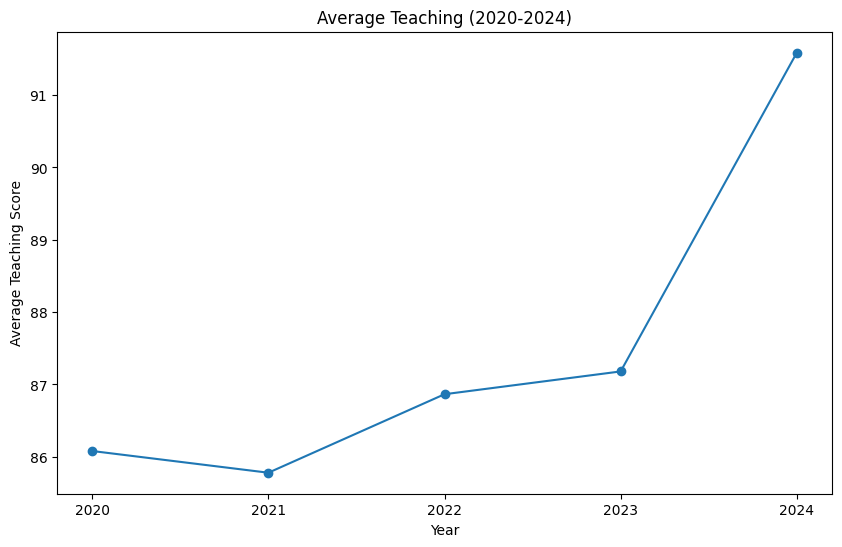

In [135]:
# Calculate average teaching score for each year
average_teaching_score_per_year = top_ranks.groupby('year')['scores_teaching'].mean()

# Extract years and average teaching scores
years = average_teaching_score_per_year.index.to_numpy()
average_teaching_scores = average_teaching_score_per_year.to_numpy()

# Create the line graph
plt.figure(figsize=(10, 6))
plt.plot(years, average_teaching_scores, marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Average Teaching Score')
plt.title('Average Teaching (2020-2024)')

# Ensure x-axis labels only show integer years
plt.xticks(years)

plt.show()

List of all unique university names that have been in top 20 across 2020-24

In [136]:
uni_names = top_ranks['name'].unique()

# Print the list of university names
print(uni_names)

['University of Oxford' 'Stanford University'
 'California Institute of Technology' 'Harvard University'
 'Massachusetts Institute of Technology' 'University of Cambridge'
 'Princeton University' 'University of California, Berkeley'
 'Yale University' 'Imperial College London' 'The University of Chicago'
 'University of Pennsylvania' 'Columbia University' 'ETH Zurich'
 'Tsinghua University' 'Johns Hopkins University' 'Peking University'
 'UCL' 'University of California, Los Angeles' 'University of Toronto'
 'Cornell University' 'National University of Singapore' 'Duke University']


Table 2. a,b

In [137]:
# 2.a
# Replace na w - for uni not in top 20 so values not there
average_scores = top_ranks.groupby(["name", "year"])["scores_teaching"].mean().unstack()
average_scores = average_scores.fillna('-') # - means uni wasnt present 
average_scores

year,2020,2021,2022,2023,2024
name,,,,,
California Institute of Technology,92.1,92.5,93.6,90.9,96.6
Columbia University,85.6,85.1,87.8,89.4,88.6
Cornell University,79.7,78.8,-,80.2,85.7
Duke University,82.4,80.7,-,-,-
ETH Zurich,81.8,80.4,81.3,82.6,87.6
Harvard University,89.2,94.4,94.5,94.8,97.7
Imperial College London,84.5,82.3,81.4,82.8,90.9
Johns Hopkins University,81.7,81.6,80.0,79.4,84.4
Massachusetts Institute of Technology,90.5,90.7,90.9,90.7,98.6


In [138]:
# 2.a
# With all values
filtered_df = df[df['name'].isin(uni_names)]

average_scores = filtered_df.groupby(["name", "year"])["scores_teaching"].mean().unstack()
average_scores

year,2020,2021,2022,2023,2024
name,,,,,
California Institute of Technology,92.1,92.5,93.6,90.9,96.6
Columbia University,85.6,85.1,87.8,89.4,88.6
Cornell University,79.7,78.8,78.6,80.2,85.7
Duke University,82.4,80.7,79.2,78.1,79.3
ETH Zurich,81.8,80.4,81.3,82.6,87.6
Harvard University,89.2,94.4,94.5,94.8,97.7
Imperial College London,84.5,82.3,81.4,82.8,90.9
Johns Hopkins University,81.7,81.6,80.0,79.4,84.4
Massachusetts Institute of Technology,90.5,90.7,90.9,90.7,98.6


In [139]:
# 2.b
average_scores2 = top_ranks.groupby(["rank", "year"])["scores_teaching"].mean().unstack()
average_scores2 = average_scores2.fillna('-') 
average_scores2

year,2020,2021,2022,2023,2024
rank,,,,,
1,90.5,91.3,91.0,92.3,96.6
2,92.1,92.2,93.6,94.8,99.0
3,91.4,94.4,94.5,90.9,98.6
4,92.8,92.5,92.3,94.2,97.7
5,90.5,90.7,90.9,90.7,95.8
6,90.3,90.3,90.9,90.9,96.3
7,89.2,85.8,89.5,87.6,96.6
8,92.0,91.9,85.7,86.4,90.9
9,89.1,88.8,90.7,92.6,87.2


In [140]:
# Graph is made wrong
# Using top_ranks for top 20 unis

universities = top_ranks["name"].values
teaching_scores = top_ranks["scores_teaching"].values
years = top_ranks["year"].values

fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x=universities,
        y=teaching_scores,
        yaxis="y2",
        name="Teaching Score",
        marker=dict(color="crimson"),
    )
)

fig.update_layout(
    legend=dict(orientation="h"),
    yaxis=dict(
        title=dict(text="Year"),
        side="left",
    ),
    yaxis2=dict(
        title=dict(text="Teaching Score"),
        side="right",
        overlaying="y",
        tickmode="sync",
    ),
)

fig.show() # ? idk what happened

Table 3 - teaching scores

Creating table for difference in 
a. first and other ranks (T15)
b. current and consecutive ranks (T45)

In [166]:
top_ranks['rank'] = top_ranks['rank'].astype(int)

# Calculate the average teaching score for each rank in each year
average_scores = top_ranks.groupby(['year', 'rank'])['scores_teaching'].mean().reset_index()

# So each row represents a year and each column represents a rank
pivot_df = average_scores.pivot(index='year', columns='rank', values='scores_teaching')

# Calculate the T values
ranks = range(1,21)

# Difference b/w first and other ranks
for i in range(len(ranks)-1):
    for j in range(i+1, len(ranks)):
        pivot_df[f'T{ranks[i]}{ranks[j]}'] = pivot_df[ranks[i]] - pivot_df[ranks[j]] # Need to include T11 - initial value to be 0 / shift this column 1 down in next table


# Difference b/w current and next rank - consecutive
for i in range(len(ranks)-1):
    pivot_df[f'T{ranks[i]}{ranks[i+1]}'] = pivot_df[ranks[i]] - pivot_df[ranks[i+1]]

pivot_df

C:\Users\cavit\AppData\Local\Temp\ipykernel_9904\2860153766.py:17: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\cavit\AppData\Local\Temp\ipykernel_9904\2860153766.py:17: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\cavit\AppData\Local\Temp\ipykernel_9904\2860153766.py:17: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented 

rank,1,2,3,4,5,6,7,8,9,10,...,T1617,T1618,T1619,T1620,T1718,T1719,T1720,T1819,T1820,T1920
year,,,,,,,,,,,,,,,,,,,,,
2020,90.5,92.1,91.4,92.8,90.5,90.3,89.2,92.0,89.1,84.5,...,2.5,9.0,5.9,3.2,6.5,3.4,0.7,-3.1,-5.8,-2.7
2021,91.3,92.2,94.4,92.5,90.7,90.3,85.8,91.9,88.8,88.9,...,-8.5,1.2,-2.2,-4.1,9.7,6.3,4.4,-3.4,-5.3,-1.9
2022,91.0,93.6,94.5,92.3,90.9,90.9,89.5,85.7,90.7,87.2,...,3.3,13.8,14.6,9.3,10.5,11.3,6.0,0.8,-4.5,-5.3
2023,92.3,94.8,90.9,94.2,90.7,90.9,87.6,86.4,92.6,82.8,...,-2.4,12.8,13.7,9.9,15.2,16.1,12.3,0.9,-2.9,-3.8
2024,96.6,99.0,98.6,97.7,95.8,96.3,96.6,90.9,87.2,94.0,...,-0.9,2.0,8.9,2.0,2.9,9.8,2.9,6.9,0.0,-6.9


In [169]:
years = [2020, 2021, 2022, 2023, 2024]

T_values1 = []
for i in range(1, 20):
    T_values1.append(f'T{i}{i+1}')
        
T_values2 = [] 
for i in range(2, 21):
    T_values2.append(f'T1{i}')

for year in years:
    print(f"Year: {year}")
    df = pd.DataFrame()
    df['Rank'] = range(1, 20)
    df['B/w 1st and other 4 ranks'] = pivot_df.loc[year, T_values1].tolist() # Need to shift this column down by 1, initial value as 0
    df['Between consecutive ranks'] = pivot_df.loc[year, T_values2].tolist()
    df.set_index('Rank', inplace=True)
    print(df)
    print("\n")


Year: 2020
      B/w 1st and other 4 ranks  Between consecutive ranks
Rank                                                      
1                          -1.6                       -1.6
2                           0.7                       -0.9
3                          -1.4                       -2.3
4                           2.3                        0.0
5                           0.2                        0.2
6                           1.1                        1.3
7                          -2.8                       -1.5
8                           2.9                        1.4
9                           4.6                        6.0
10                         -3.0                        3.0
11                          5.8                        8.8
12                         -1.3                        7.5
13                          1.2                        8.7
14                          4.0                       12.7
15                         -7.8              

2. Overall_Scores_Key_Statistics

# Overall scores

In [201]:
columns = ['stats_student_staff_ratio'] # need to add columns  stats_number_students ,stats_student_staff_ratio,stats_pc_intl_students,stats_female_male_ratio, convert to integer

# Filter top 5 universities each year
top_5_universities = df[df['rank'] <= 5]

# Calculate mean, median, mode, and standard deviation for each year
statistics = top_5_universities.groupby('year')[columns].agg(['mean', 'median', lambda x: x.mode()[0], 'std'])

# Print the calculated statistics
print(statistics)

     stats_student_staff_ratio                            
                          mean median <lambda_0>       std
year                                                      
2020                      8.88    8.6        6.4  2.132370
2021                      8.50    8.4        6.3  1.834394
2022                      8.98    9.5        6.3  2.105232
2023                      9.36    9.6        7.1  1.718430
2024                      9.16    9.0        6.4  2.091172


In [204]:
import re

# Your input string
s = 'data["stats_number_students"]'

# Remove unwanted characters
s = re.sub(r'[",:%]', '', s)

# Split the string into a list
values = s.split()

# Convert strings to numerical values
numerical_values = []
for value in values:
    # Check if the value can be converted to an integer
    try:
        numerical_values.append(int(value))
    except ValueError:
        # If not, convert to float
        numerical_values.append(float(value))

print(numerical_values)


ValueError: could not convert string to float: 'data[stats_number_students]'